# Statistical Thinking in Python (Part 1)

## Graphical exploratory data analysis

### Introduction to Exploratory Data Analysis


### Plotting a histogram

In [49]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

raw_iris = load_iris()
iris = pd.DataFrame(raw_iris.data, columns=raw_iris.feature_names)
iris['species'] = pd.Categorical.from_codes(raw_iris.target, raw_iris.target_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
versicolor = iris[iris['species'] == 'versicolor']
versicolor_petal_length = versicolor['petal length (cm)']
versicolor_petal_width = versicolor['petal width (cm)']

#### Plotting a histogram of iris data

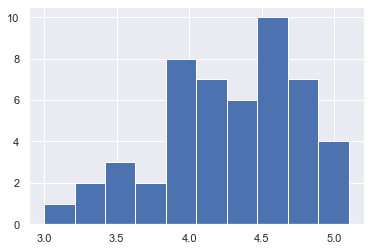

In [51]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

#### Axis labels

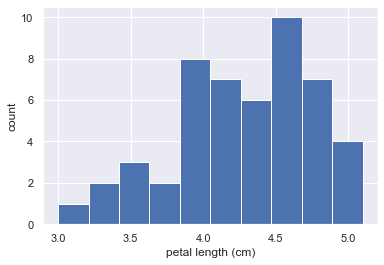

In [52]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')


# Show histogram
plt.show()


#### Adjusting the number of bins in a histogram

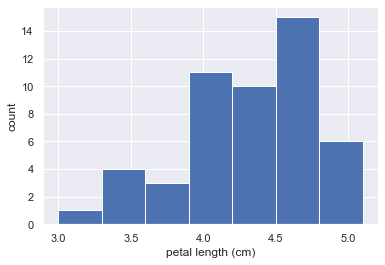

In [53]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

### Plot all of your data: Bee swarm plots

#### Bee swarm plot

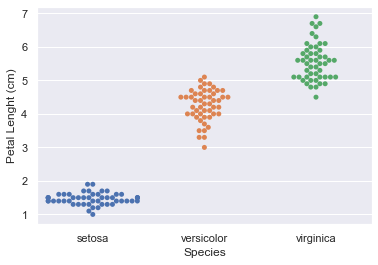

In [56]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal length (cm)', data=iris)

# Label the axes
plt.xlabel('Species')
plt.ylabel('Petal Lenght (cm)')

# Show the plot
plt.show()


### IPlot all of your data: ECDFs


#### Computing the ECDF

In [57]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


#### Plotting the ECDF

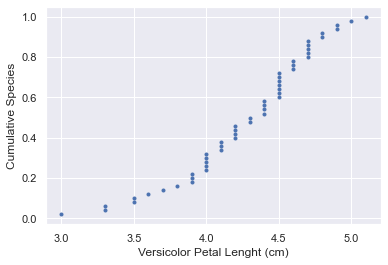

In [59]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
plt.xlabel('Versicolor Petal Lenght (cm)')
plt.ylabel('Cumulative Species')


# Display the plot
plt.show()


#### Comparison of ECDFs

In [61]:
setosa = iris[iris['species'] == 'setosa']
setosa_petal_length = setosa['petal length (cm)']

virginica = iris[iris['species'] == 'virginica']
virginica_petal_length = virginica['petal length (cm)']

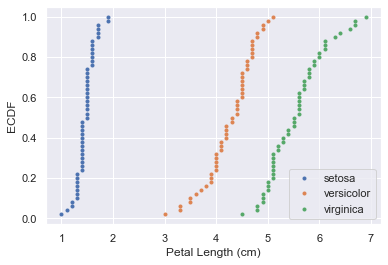

In [63]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers= ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot

plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('Petal Length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## Quantitative exploratory data analysis

### Introduction to summary statistics: The sample mean and median


#### Computing mean

In [64]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


### Percentiles, outliers, and box plots

#### Computing percentiles

In [67]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


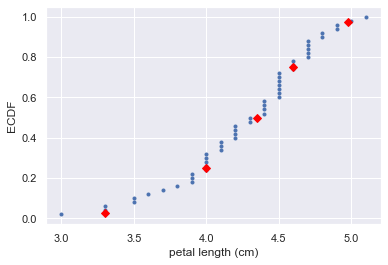

In [68]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

#### Box-and-whisker plot

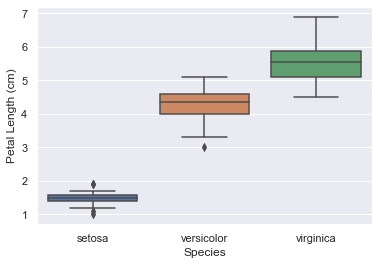

In [73]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=iris)

# Label the axes
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')


# Show the plot
plt.show()


### Variance and standard deviation

#### Computing the variance

In [74]:
# Array of differences to mean: differences
differences = versicolor_petal_length - versicolor_petal_length.mean()

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print('Explicit variance %(explicit)f, Numpy variance %(numpy)f' % {'explicit':variance_explicit, 'numpy':variance_np})



Explicit variance 0.216400, Numpy variance 0.216400


#### The standard deviation and the variance

In [75]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


### Covariance and the Pearson correlation coefficient


#### Scatter plots

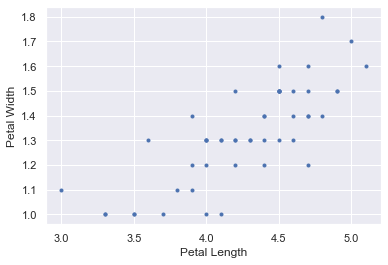

In [79]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


# Show the result
plt.show()

#### Computing the covariance

In [80]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width )

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


#### Computing the Pearson correlation coefficient

In [81]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## Thinking probabilistically-- Discrete variables

### Random number generators and hacker statistics



#### Generating random numbers using the np.random module

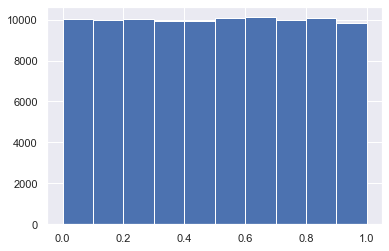

In [82]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


#### The np.random module and Bernoulli trials

In [83]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

#### How many defaults might we expect?

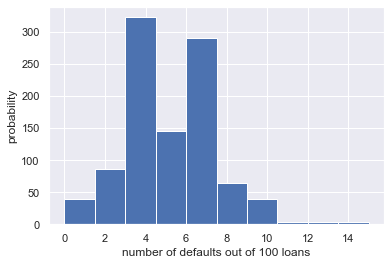

In [85]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

#### Will the bank fail?

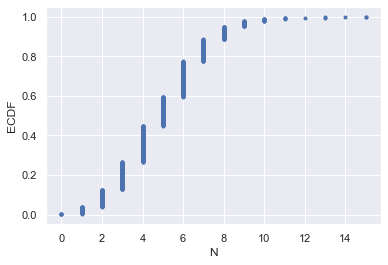

Probability of losing money = 0.022


In [86]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel('N')
plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


#### Sampling out of the Binomial distribution

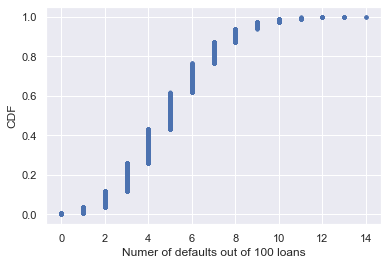

In [87]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel('Numer of defaults out of 100 loans')
plt.ylabel('CDF')


# Show the plot
plt.show()

#### Plotting the Binomial PMF

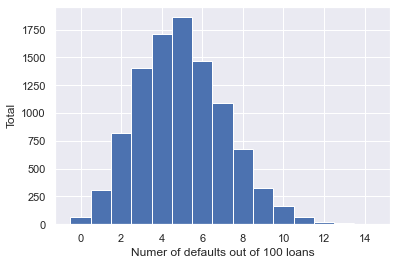

In [89]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 2) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins)

# Label axes
plt.xlabel('Numer of defaults out of 100 loans')
plt.ylabel('Total')


# Show the plot
plt.show()

### Poisson processes and the Poisson distribution


#### 